In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Research files/New Batch Expressionism more than 100 paintings/"

 164159966_925958068154485_5197835791071241170_n.jpg
 201464423-21009813-PaymentSlip.pdf
'Colab Notebooks'
'Files from Favites'
'Form5a and Grades'
'Getting started.pdf'
'Physics 107.1 First Sem AY 2020-21'
'Physics 305 Data Driven Astronomy'
'Physics 71 V-1 2S AY2020-21'
'Physics 72.1 HBC FBC'
'Research files'
'Untitled document.gdoc'


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms

BATCH_SIZE = 4
TRAIN_DATA_PATH = file_path + "./Train/"
TEST_DATA_PATH = file_path + "./Test/"

#train_data = CustomImageFolder(root=TRAIN_DATA_PATH, transform=transform)
#trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
#test_data = CustomImageFolder(root=TEST_DATA_PATH, transform=transform)
#testloader  = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transform)
trainloader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=transform)
testloader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
classes = ("Amedeo Modigliani","Chaim Soutine","Edvard Munch","Egon Schiele","Ernst Ludwig Kirchner","Francis Bacon","George Stefanescu","Josef Capek",
           "Lucian Freud","Maria Bozoky","Martiros Sarian","Otto Mueller","Pablo Picasso","Paul Klee","Petros Malayan","Zinaida Serebriakova")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


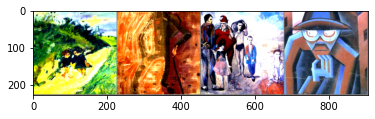

Chaim Soutine Josef Capek Pablo Picasso Josef Capek


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#Now using the AlexNet
#AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
VGG16_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
#Model description
VGG16_model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Updating the second classifier
#VGG16_model.classifier[3] = nn.Linear(4096,1024)
#VGG16_model.classifier[4] = nn.Linear(4096,1024)#FOR ALEXNET

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
#VGG16_model.classifier[6] = nn.Linear(1024,16)

VGG16_model.fc = nn.Linear(512,16)

In [ ]:
VGG16_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
VGG16_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim
import torch.nn as nn

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(VGG16_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(200):  # loop over the dataset multiple times
    print(epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       # inputs = inputs.transpose(2, 0, 1)
        output = VGG16_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training of VGG16')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Finished Training of VGG16


In [ ]:
predictions, targets = [], []
for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    logps = VGG16_model(images)
    output = torch.exp(logps)
    pred = torch.argmax(output, 1)

    # convert to numpy arrays
    pred = pred.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()

    for i in range(len(pred)):
        predictions.append(pred[i])
        targets.append(labels[i])

Confusion matrix, without normalization
[[193   6  15   7   0   6   1   1   2   2   2   5   4   2   1   2]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2  29   2   2   2   2   3   2   1   7   1   6   1   1   4]
 [  2   2   3  80   1   1   1   0   4   0   7   2   7   4   2   0]
 [  0  10  18   3 135   3  13  13   6  13  18  21  21   4   2   1]
 [  0   1   3   1   0  53   0   1   1   0   0   0   1   0   0   2]
 [  1   0   2   0   2   1  32   1   0   1   0   0   2   0   1   0]
 [  0   0   0   0   2   0   1   6   0   0   0   0   0   0   1   0]
 [  6   1   2   7   1   1   0   0 111   3   3   6   1   5   2   5]
 [  0   7   4   2   7   3  12   2   1  73   6   1   2   3   2   1]
 [  4   1  11   6   9   0   5   8  11   5 114   2   9   4   3   9]
 [  0   2   2   0   4   0   0   2   0   1   3  69   2   0   0   5]
 [  4   6   5   5   9   5   5   1   8   3  11   2  44   8   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1]
 [  0   1   2   2   4 

<Figure size 432x288 with 0 Axes>

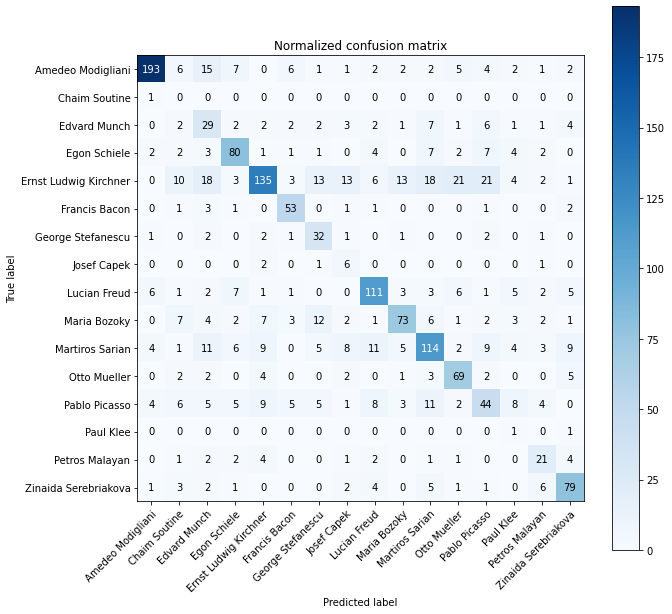

In [ ]:
# import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='True label',
            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#    fig.tight_layout()
    return ax
plt.figure()
# plt.figure(figsize=(100, 120))
plot_confusion_matrix(targets, predictions, classes=classes,  normalize=False,
                      title='Normalized confusion matrix')
plt.savefig("CM Normalized with dropout and validation.png")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
PRF = precision_recall_fscore_support(targets, predictions, average='weighted')
print("PRF: ",PRF)
print("Expressionism 200 Resnet")

PRF:  (0.6838843555885595, 0.6246246246246246, 0.6433869382623579, None)
Expressionism 200 Alexnet
